<a href="https://githubtocolab.com/Sher016/IA/blob/main/01%20-%20exploración.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>


 # UDEA/ai4eng 20242 - Pruebas Saber Pro Colombia
 Crear un modelo con el objetivo de predecir el rendimiento de los estudiantes en las pruebas Saber Pro.


Las Pruebas Saber Pro son exámenes estandarizados que se administran en Colombia para evaluar la calidad y el nivel de conocimiento y competencias de los estudiantes de educación superior, es decir, de instituciones de educación superior como universidades y tecnológicos. Estas pruebas son parte de los esfuerzos del Gobierno de Colombia para monitorear y mejorar la calidad de la educación superior en el país.

Estas Pruebas constan cinco componentes genéricos, Inglés, Lectura Crítica, Competencias Ciudadanas, Razonamiento Cuantitativo y Comunicación Escrita.

En este caso, el target es el rendimiento del estudiante el cual se clasifica en bajo, medio-bajo, medio-alto o alto.

Finalmente, el modelo se evaluará con varias métricas como RMAE, MSE, neg R2 score y los ratios de MAE y RMSE.

- IMPORTANTE:
 Antes de correr éste codigo en colab, al ser un dataset de Kagel este necesitara una autentificación, mediante un token que puede ser descargado desde el propio Kagel siguiendo el siguiente tutorial: https://www.kaggle.com/docs/api, específicamente en la parte de "Authentication". Después de esto se corre la parte de código:

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle competitions download -c udea-ai4eng-20242

In [ ]:
!unzip udea-ai4eng-20242.zip

# Código
Ahora, se realizará primero la carga de los archivos para posteriormente hacerle una exploración a estos, la exploración será de forma estadistica, se mostrará mediante graficas qué tipo de distribución tienen los datos, y se tomarán a analizar posteriormente datos que tengan una distribución normal representativa o en caso de los booleanos, que presenten una diferencia significativa. La visualización de la distribución de los datos ayuda a identificar patrones, sesgos y anomalías, es más cómodo de analizar en términos estadisticos.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import preprocessing as ps
from difflib import SequenceMatcher

Se carga la información en forma de dataframe utilizando pandas

In [ ]:
df = pd.read_csv("train.csv")
df.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


Exploración de datos, para ver cantidad de datos en cada clase y además identificación de datos nulos

In [ ]:
print(df['RENDIMIENTO_GLOBAL'].value_counts()) #cuantos estudiantes hay por cada clase

alto          175619
bajo          172987
medio-bajo    172275
medio-alto    171619
Name: RENDIMIENTO_GLOBAL, dtype: int64


In [ ]:
print(df.isnull().sum())

ID                                    0
PERIODO                               0
ESTU_PRGM_ACADEMICO                   0
ESTU_PRGM_DEPARTAMENTO                0
ESTU_VALORMATRICULAUNIVERSIDAD     6287
ESTU_HORASSEMANATRABAJA           30857
FAMI_ESTRATOVIVIENDA              32137
FAMI_TIENEINTERNET                26629
FAMI_EDUCACIONPADRE               23178
FAMI_EDUCACIONMADRE               23664
ESTU_PAGOMATRICULAPROPIO           6498
RENDIMIENTO_GLOBAL                    0
dtype: int64


Se observa que hay columnas donde hay muchos datos nulos, la que más datos nulos tiene es "FAMI_ESTRATOVIVIENDA", a la hora de hacer un análisis hay que tener en cuenta ésto.

In [ ]:
#Se hace una copia del dataframe para poder manipular los datos
df2=df.copy()

Se asignan valores númericos a las variables de rendimiento para facilitar la clasificación

In [ ]:
df2['RENDIMIENTO_GLOBAL'] = df2['RENDIMIENTO_GLOBAL'].map({
    'bajo': 0, 'medio-bajo': 1, 'medio-alto': 2, 'alto': 3})
df2.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,2
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,0
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,0
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,3
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,1


Ahora, se realizan gráficas mediante histogramas para observar la distribución de las variables

para poder agilizar y facilitar el flujo de exploración de datos, se usaran funciones para graficar y sacar valores estadisticos.

In [ ]:
#histograma
def plot1(df, column, target, title="Frecuencia de valores con respecto al target"):
    plt.figure(figsize=(8, 8))
    sns.countplot(x=column, data=df, hue=target)
    plt.title(title, fontsize=16)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.xticks(rotation=45)  # Rotar etiquetas si son largas
    plt.legend(title=target)
    plt.show()

In [ ]:
estrato_order = ['Sin Estrato','Estrato 1', 'Estrato 2', 'Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 6']
df2['FAMI_ESTRATOVIVIENDA'] = pd.Categorical(df2['FAMI_ESTRATOVIVIENDA'], categories=estrato_order, ordered=True)

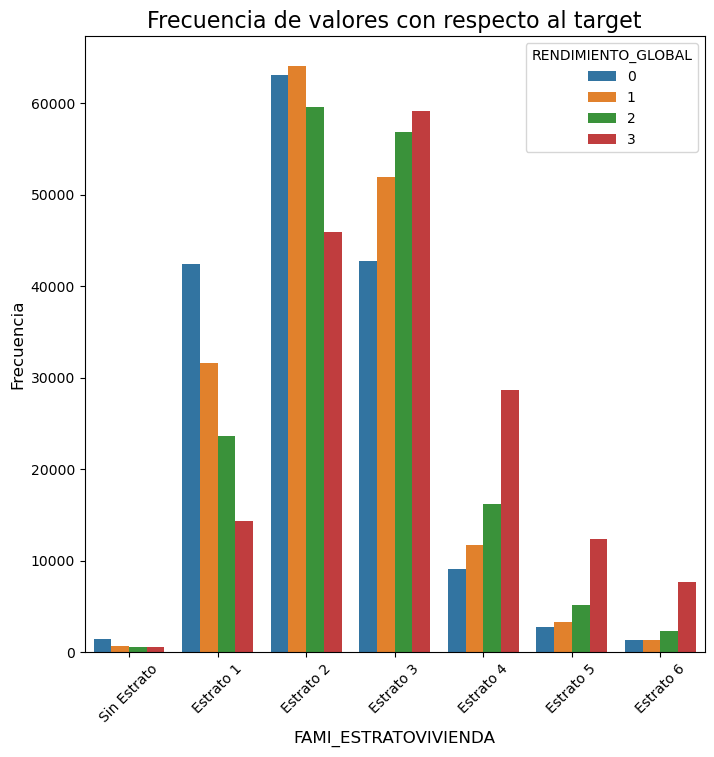

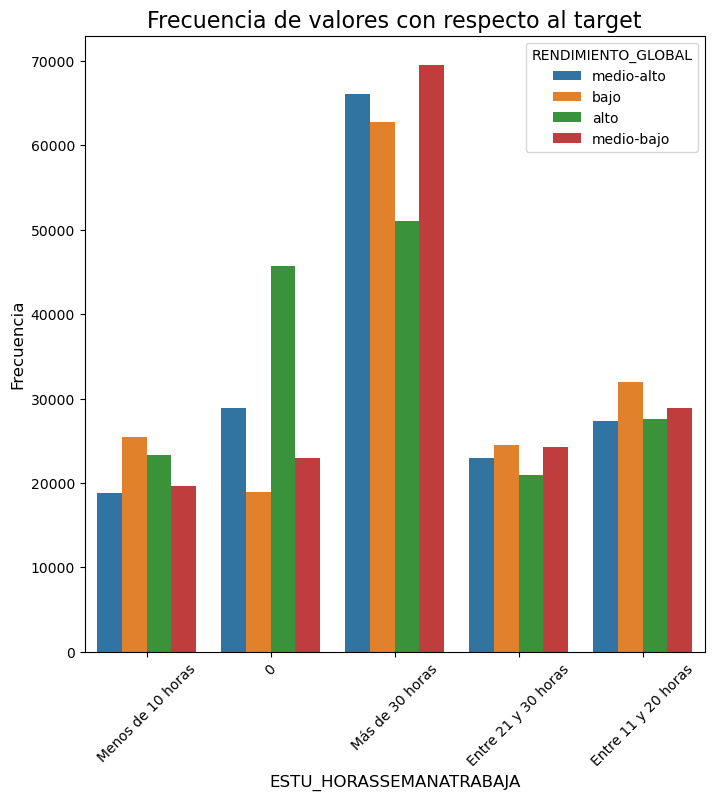

In [ ]:
plot1(df2,'FAMI_ESTRATOVIVIENDA','RENDIMIENTO_GLOBAL')
plot1(df,'ESTU_HORASSEMANATRABAJA', 'RENDIMIENTO_GLOBAL')

Se hizo el diagrama de bigotes, con los datos de la columna 'RENDIMIENTO_GLOBAL', categorizados en valores númericos.

In [ ]:

def plot_boxplot(df, factor,target, title, figsize=(10, 6), whis=1.5):
    plt.figure(figsize=figsize)
    sns.boxplot(x=factor, y=target, data=df, whis=whis)
    plt.title(title, fontsize=12)
    plt.xlabel(factor, fontsize=12)
    plt.ylabel(target, fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

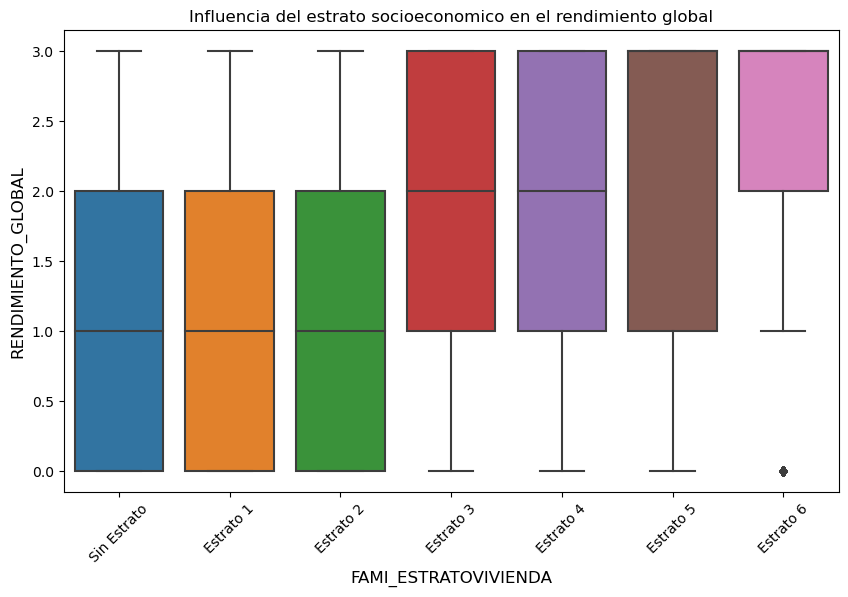

In [ ]:
plot_boxplot(df2,'FAMI_ESTRATOVIVIENDA','RENDIMIENTO_GLOBAL',"Influencia del estrato socioeconomico en el rendimiento global")

Por ejemplo, en éste diagrama de bigotes se puede observar que los estudiantes correspondientes a los estratos más bajos tuvieron un rendimiento menor en comparación con los de estratos más altos.
n el gráfico de boxplot, que muestra la distribución del rendimiento global para cada estrato socioeconómico, se puede observar una tendencia clara en la influencia del estrato en el rendimiento académico.

Más especificamente:

Estratos 1 y 2: La distribución de los resultados se concentra principalmente entre 0 y 2, lo que indica que la mayoría de los estudiantes en estos estratos obtienen un rendimiento entre "bajo" (0) y "medio-alto" (2).

Estratos 3, 4 y 5: La distribución es bastante uniforme, con rendimientos que van desde "medio-bajo" (1) hasta "alto" (3). Esto sugiere que los estudiantes de estos estratos tienen un rendimiento más equilibrado y generalmente mejor que aquellos en los estratos más bajos.

Estrato 6: Los resultados están predominantemente entre 2 y 3, lo que corresponde a un rendimiento "medio-alto" (2) y "alto" (3), indicando que los estudiantes en este estrato tienden a obtener los puntajes más altos.

Estos patrones sugieren que el estrato socioeconómico es un factor significativo en el rendimiento académico de los estudiantes en las Pruebas Saber Pro.

Se observa además que, para los datos que son booleanos, un histograma no es muy representativo, por tanto se evalúan entonces otras formas de mostrar la información de manera que sea últil a la hora de encontrar diferencias en los factores. Esto ayudará a elegir correctamente la información que se utilizará en el modelo posteriormente.

In [ ]:
#para crear una diagrama de barras
def plot_bar(df, factor, target,title):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=factor, hue=target, data=df)
    plt.title(title, fontsize=12)
    plt.xlabel(factor, fontsize=12)
    plt.ylabel('Conteo', fontsize=12)
    plt.legend(title=target)
    plt.show()


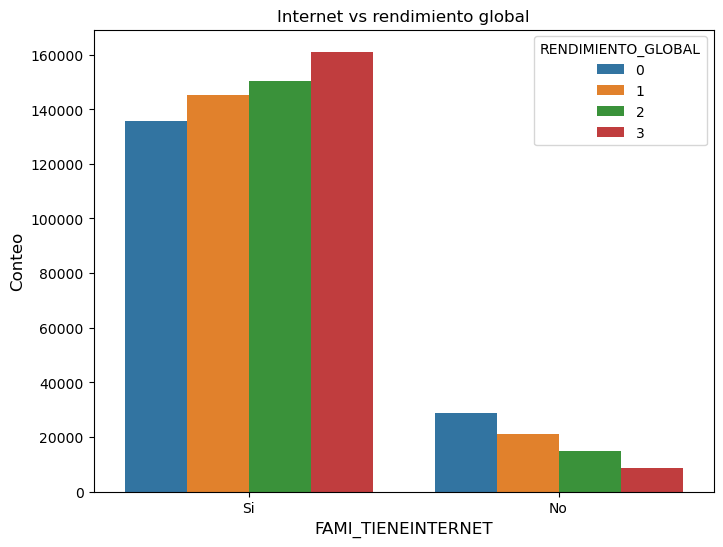

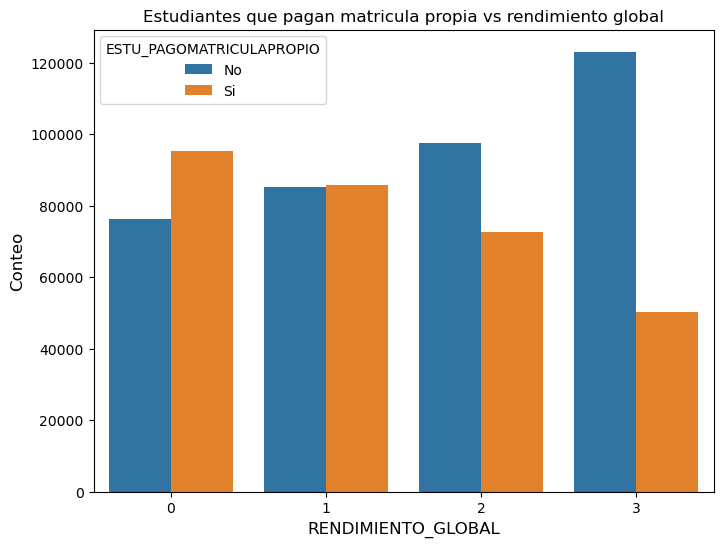

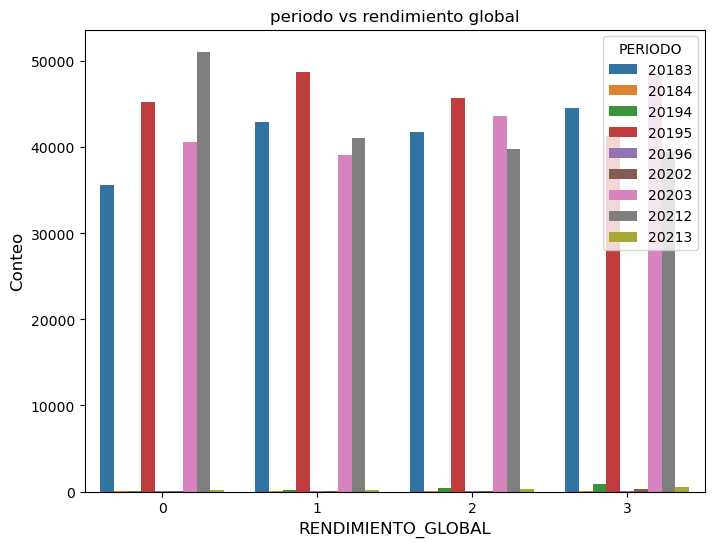

In [ ]:
plot_bar(df2,'FAMI_TIENEINTERNET','RENDIMIENTO_GLOBAL', "Internet vs rendimiento global")
plot_bar(df2,'RENDIMIENTO_GLOBAL','ESTU_PAGOMATRICULAPROPIO', "Estudiantes que pagan matricula propia vs rendimiento global")
plot_bar(df2,'RENDIMIENTO_GLOBAL','PERIODO',"periodo vs rendimiento global")

Al examinar la distribución de los datos para cada período en relación con las diferentes categorías de rendimiento global, se observa que la cantidad de registros para cada categoría de rendimiento es bastante similar a través de los distintos períodos. Esto sugiere que el período no parece tener una influencia significativa en el rendimiento global, ya que la distribución de los datos no varía notablemente entre los períodos.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'CHOCO'),
  Text(1, 0, 'SAN ANDRES'),
  Text(2, 0, 'GUAVIARE'),
  Text(3, 0, 'LA GUAJIRA'),
  Text(4, 0, 'PUTUMAYO'),
  Text(5, 0, 'AMAZONAS'),
  Text(6, 0, 'ARAUCA'),
  Text(7, 0, 'SUCRE'),
  Text(8, 0, 'CAQUETA'),
  Text(9, 0, 'CORDOBA'),
  Text(10, 0, 'CESAR'),
  Text(11, 0, 'CASANARE'),
  Text(12, 0, 'HUILA'),
  Text(13, 0, 'NORTE SANTANDER'),
  Text(14, 0, 'CAUCA'),
  Text(15, 0, 'BOLIVAR'),
  Text(16, 0, 'TOLIMA'),
  Text(17, 0, 'MAGDALENA'),
  Text(18, 0, 'NARIÑO'),
  Text(19, 0, 'VAUPES'),
  Text(20, 0, 'META'),
  Text(21, 0, 'ATLANTICO'),
  Text(22, 0, 'QUINDIO'),
  Text(23, 0, 'BOGOTÁ'),
  Text(24, 0, 'RISARALDA'),
  Text(25, 0, 'VALLE'),
  Text(26, 0, 'ANTIOQUIA'),
  Text(27, 0, 'BOYACA'),
  Text(28, 0, 'SANTANDER'),
  Text(29, 0, 'CALDAS'),
  Text(30, 0, 'CUNDINAMARCA')])

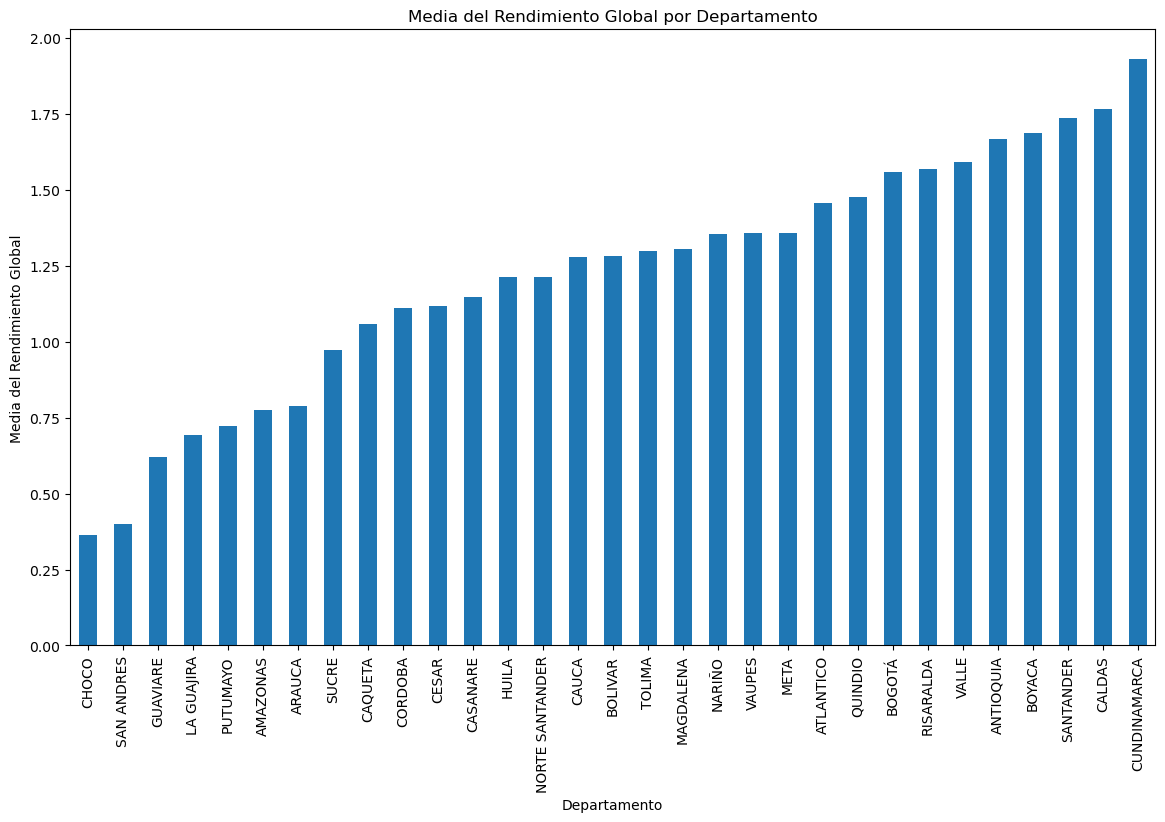

In [ ]:
mean_rendimiento = df2.groupby('ESTU_PRGM_DEPARTAMENTO')['RENDIMIENTO_GLOBAL'].mean().sort_values()
plt.figure(figsize=(14, 8))
mean_rendimiento.plot(kind='bar')
plt.title('Media del Rendimiento Global por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Media del Rendimiento Global')
plt.xticks(rotation=90)

Este gráfico de barras permite observar la media del rendimiento global de los estudiantes en cada departamento, en el cual se puede identificar que algunos departamentos presentan un rendimiento promedio significativamente más bajo, como Chocó y San Andrés, en comparación con departamentos con el rendimiento promedio más alto como Cundinamarca, Caldas, Santander , Boyacá, entre otros.

In [ ]:
print(df['PERIODO'].value_counts())


20195    180873
20203    171838
20212    171412
20183    164818
20194      1472
20213      1178
20202       490
20184       254
20196       165
Name: PERIODO, dtype: int64


Períodos como 20195, 20203, 20212 y 20183 tienen un número de registros considerablemente mayor en comparación con períodos como 20194, 20213, 20202, 20184 y 20196. Estas diferencias entre la cantidad de datos podría influir en la calidad del modelo, ya que los períodos con menos datos podrían introducir ruido y afectar la precisión del modelo.

SCATTER PLOT


In [ ]:


def plot_scatter(df, factor1, factor2, target):
    plt.figure(figsize=(12, 6))
    plt.scatter(df[factor1],
                df[factor2],
                c=df[target],
                cmap='bwr',
                alpha=0.6,
                edgecolors='w',
                s=100)

    plt.xlabel(factor1)
    plt.ylabel(factor2)
    plt.colorbar(label=target)
    plt.show()



In [ ]:

from scipy.stats import norm

def plot_normal(df, factor):
    data = df[factor]

    sns.histplot(data, kde=True, stat='density', color='blue', bins=40)

    mean, std = np.mean(data), np.std(data)
    x = np.linspace(data.min(), data.max(), 100)
    p = norm.pdf(x, mean, std)

    # Graficar la distribución normal
    plt.plot(x, p, 'r--', label='Normal')
    plt.xlabel(factor)
    plt.ylabel('Densidad')
    plt.title(f'Distribución de {factor} vs Normal')
    plt.legend()
    plt.show()